In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
from matplotlib.ticker import EngFormatter
from benchmark_plot import fetch_data, xye, cur

In [16]:
%matplotlib notebook
db = 'file:../project/benchmarks/results.db?mode=ro'
con = sqlite3.connect(db, uri=True)
cur = con.cursor()

def select(nth):
    return lambda x: x[nth]

def compare_runs(run_ids, labels, mode='tree'):
    data = dict()
    for run_id, label in zip(run_ids, labels):
        cur.execute('SELECT n_summands, time_ns * 1e-9, stddev * 1e-9 FROM results WHERE mode=? AND run_id=? ORDER BY n_summands ASC',
                   (mode, run_id))
        data[label] = cur.fetchall()

    f = plt.figure()
    ax = f.subplots(1)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel('Accumulate Time')
    ax.set_xlabel('number of summands')

    formatter0 = EngFormatter(unit='s', places=0)
    formatter1 = EngFormatter(places=0)
    ax.yaxis.set_major_formatter(formatter0)
    ax.xaxis.set_major_formatter(formatter1)

    for label, measurements in data.items():
        x = map(select(0), measurements)
        y = map(select(1), measurements)
        e = list(map(select(2), measurements))
        #ax.scatter(list(x), list(y), label=label)
        #ax.plot(list(x), list(y), ".-", label=label)
        ax.errorbar(list(x), list(y), yerr=e, fmt='.', label=label, capsize=2.0)


    ax.legend(loc='upper left')

    #return f

<IPython.core.display.Javascript object>


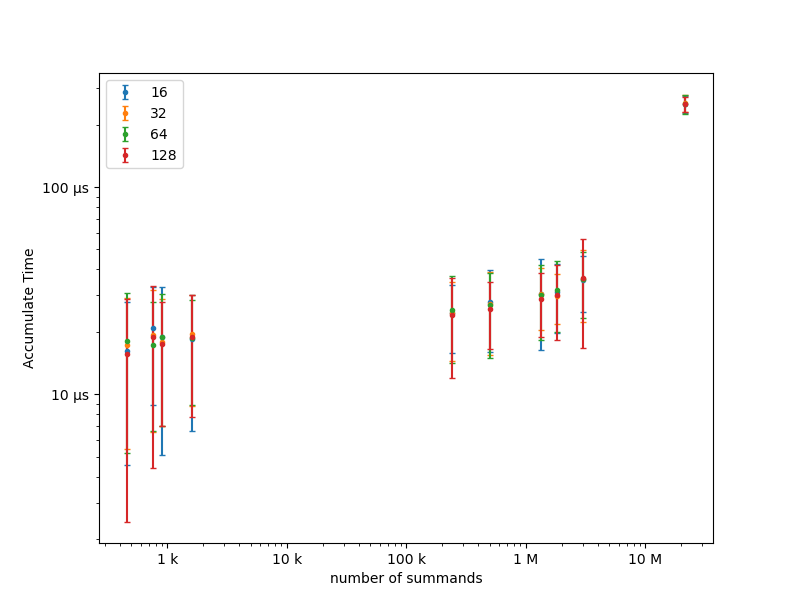

In [17]:
compare_runs([83, 85, 84, 82], ["16", "32", "64", "128"])

In [ ]:
compare_runs()